<div class="alert alert-info"> 
        <h1 align="center" style="color:chocolate;">Loan Approval Prediction Dataset
</h1>  
     
</div>

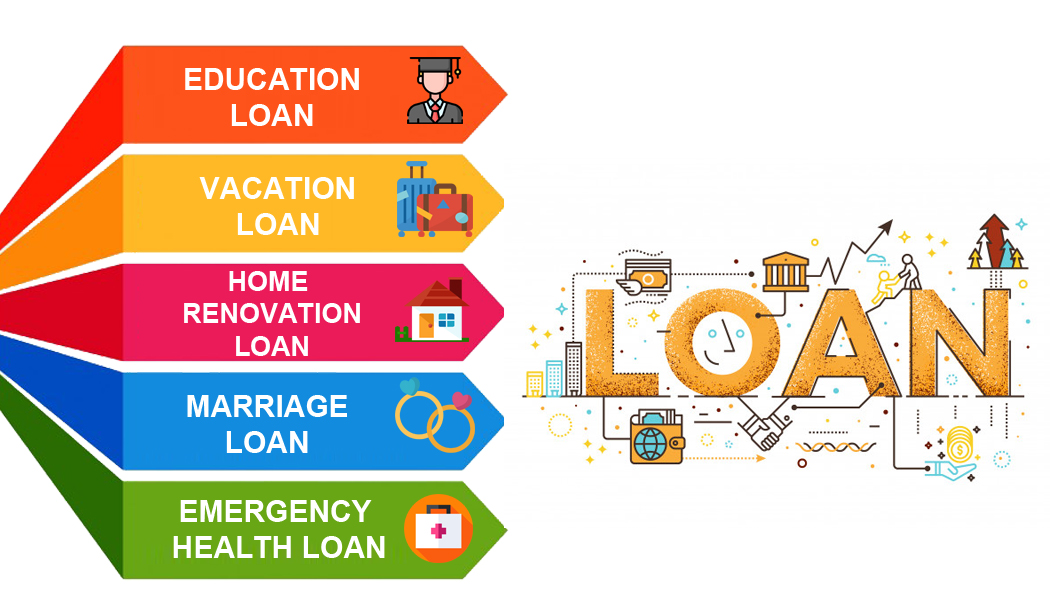

<h1>Introduction</h1>
<h2>Goal of Competition</h2>
Predict whether an applicant is approved for a loan.


### Import Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

### Read Train and Test Data

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

## Let's Explore the train data

In [3]:
print(f"The shape of train data: {train_df.shape}\n")


display(train_df.sample(5))

The shape of train data: (58645, 13)



id  person_age  person_income person_home_ownership  \
18763  18763          32          87600              MORTGAGE   
27224  27224          25          52800              MORTGAGE   
21336  21336          28          40000                  RENT   
6818    6818          25          90000              MORTGAGE   
9669    9669          29          60000                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
18763               16.0  DEBTCONSOLIDATION          B      20000   
27224                2.0           PERSONAL          A       5600   
21336                1.0  DEBTCONSOLIDATION          A       4000   
6818                 9.0           PERSONAL          E      21125   
9669                 0.0    HOMEIMPROVEMENT          B      12500   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
18763          10.25                 0.24                         N   
27224           7.29                 0.11                         N   
21336           7.14                 0.10                         N   
6818           16.89                 0.23                         Y   
9669           11.83                 0.21                         N   

       cb_person_cred_hist_length  loan_status  
18763                           7            0  
27224                           4            0  
21336                           6            0  
6818                            4            0  
9669                            7            0

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
train_df.drop(columns=['id'], inplace=True)
test_df.drop(columns=['id'], inplace=True)

In [6]:
train_df.head(2)

person_age  person_income person_home_ownership  person_emp_length  \
0          37          35000                  RENT                0.0   
1          22          56000                   OWN                6.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0

### Check for duplicates

In [7]:
print(f"Any duplicates in train data? {train_df.duplicated().values.any()}")

Any duplicates in train data? False


In [8]:
train_df.isna().values.sum()

0

In [9]:
train_df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  58645.000000   5.864500e+04       58645.000000  58645.000000   
mean      27.550857   6.404617e+04           4.701015   9217.556518   
std        6.033216   3.793111e+04           3.959784   5563.807384   
min       20.000000   4.200000e+03           0.000000    500.000000   
25%       23.000000   4.200000e+04           2.000000   5000.000000   
50%       26.000000   5.800000e+04           4.000000   8000.000000   
75%       30.000000   7.560000e+04           7.000000  12000.000000   
max      123.000000   1.900000e+06         123.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   58645.000000         58645.000000                58645.000000   
mean       10.677874             0.159238                    5.813556   
std         3.034697             0.091692                    4.029196   
min         5.420000             0.000000                    2.000000   
25%         7.880000             0.090000                    3.000000   
50%        10.750000             0.140000                    4.000000   
75%        12.990000             0.210000                    8.000000   
max        23.220000             0.830000                   30.000000   

        loan_status  
count  58645.000000  
mean       0.142382  
std        0.349445  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Let's Explore the test data

In [10]:
print(f"The shape of test data: {test_df.shape}\n")


display(test_df.sample(5))

The shape of test data: (39098, 11)



person_age  person_income person_home_ownership  person_emp_length  \
3420           23          49000              MORTGAGE                7.0   
28321          31         130000              MORTGAGE                5.0   
13469          28          60000                  RENT                2.0   
3215           32          29000                  RENT                2.0   
23047          31         103000                  RENT                9.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  \
3420         EDUCATION          B       3500          10.25   
28321  HOMEIMPROVEMENT          A       7000           7.14   
13469          VENTURE          B      20000          12.18   
3215           MEDICAL          B       8000          10.00   
23047         PERSONAL          D       8000          15.33   

       loan_percent_income cb_person_default_on_file  \
3420                  0.07                         N   
28321                 0.05                         N   
13469                 0.33                         N   
3215                  0.28                         N   
23047                 0.08                         Y   

       cb_person_cred_hist_length  
3420                            3  
28321                           5  
13469                          10  
3215                            8  
23047                           5

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.3+ MB


In [12]:
print(f"Any duplicates in test data? {test_df.duplicated().values.any()}")

Any duplicates in test data? False


In [13]:
test_df.describe(include='all')

person_age  person_income person_home_ownership  person_emp_length  \
count   39098.000000   3.909800e+04                 39098       39098.000000   
unique           NaN            NaN                     4                NaN   
top              NaN            NaN                  RENT                NaN   
freq             NaN            NaN                 20280                NaN   
mean       27.566781   6.406046e+04                   NaN           4.687068   
std         6.032761   3.795583e+04                   NaN           3.868395   
min        20.000000   4.000000e+03                   NaN           0.000000   
25%        23.000000   4.200000e+04                   NaN           2.000000   
50%        26.000000   5.800000e+04                   NaN           4.000000   
75%        30.000000   7.588500e+04                   NaN           7.000000   
max        94.000000   1.900000e+06                   NaN          42.000000   

       loan_intent loan_grade     loan_amnt  loan_int_rate  \
count        39098      39098  39098.000000   39098.000000   
unique           6          7           NaN            NaN   
top      EDUCATION          A           NaN            NaN   
freq          8076      14005           NaN            NaN   
mean           NaN        NaN   9251.466188      10.661216   
std            NaN        NaN   5576.254680       3.020220   
min            NaN        NaN    700.000000       5.420000   
25%            NaN        NaN   5000.000000       7.880000   
50%            NaN        NaN   8000.000000      10.750000   
75%            NaN        NaN  12000.000000      12.990000   
max            NaN        NaN  35000.000000      22.110000   

        loan_percent_income cb_person_default_on_file  \
count          39098.000000                     39098   
unique                  NaN                         2   
top                     NaN                         N   
freq                    NaN                     33227   
mean               0.159573                       NaN   
std                0.091633                       NaN   
min                0.000000                       NaN   
25%                0.090000                       NaN   
50%                0.140000                       NaN   
75%                0.210000                       NaN   
max                0.730000                       NaN   

        cb_person_cred_hist_length  
count                 39098.000000  
unique                         NaN  
top                            NaN  
freq                           NaN  
mean                      5.830707  
std                       4.072157  
min                       2.000000  
25%                       3.000000  
50%                       4.000000  
75%                       8.000000  
max                      30.000000

In [14]:
train_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

### EDA for Train Data

#### Let's Explore the unique values and count of the categorical features with respect to loan status

In [15]:
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [16]:
home_ownshp_data = train_df.person_home_ownership.value_counts()
home_ownshp_data

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [17]:
fig = px.pie(labels=home_ownshp_data.index,
            values=home_ownshp_data.values,
            title='Percentage of loan requests by home ownership Category',
            names=home_ownshp_data.index)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
fig.show()

In [18]:
home_df = train_df.groupby('person_home_ownership', as_index=False)['loan_status'].value_counts()
cols= ['person_home_ownership', 'loan_status', 'total'] 
home_df.columns = cols
home_df.sort_values('total', ascending=False)

person_home_ownership  loan_status  total
6                  RENT            0  23785
0              MORTGAGE            0  23341
7                  RENT            1   6809
4                   OWN            0   3095
1              MORTGAGE            1   1483
2                 OTHER            0     74
5                   OWN            1     43
3                 OTHER            1     15

In [19]:
loan_int_df = train_df.groupby(['loan_intent', 'loan_grade'], as_index=False)['loan_status'].value_counts()
cols = ['loan_intent', 'loan_grade','loan_status', 'total_count']
loan_int_df.columns = cols
loan_int_df.sort_values(['loan_status','total_count'], ascending=False)

loan_intent loan_grade  loan_status  total_count
6   DEBTCONSOLIDATION          D            1          788
45            MEDICAL          D            1          780
42            MEDICAL          B            1          425
59           PERSONAL          D            1          420
55           PERSONAL          B            1          417
..                ...        ...          ...          ...
65           PERSONAL          G            0            3
79            VENTURE          G            0            2
11  DEBTCONSOLIDATION          F            0            1
38    HOMEIMPROVEMENT          G            0            1
50            MEDICAL          F            0            1

[80 rows x 4 columns]

In [20]:
bar = px.bar(x=home_df.person_home_ownership,
      y=home_df.total,
      color=home_df.loan_status,
      color_continuous_scale='agsunset',
      title='bar plot for person home ownership vs loan status')

bar.update_layout(xaxis_title='person home ownership',
                 yaxis_title='count of loans',
                 xaxis={'categoryorder':'total descending'})
bar.show()

### According to the above bar plot, the approved loan is higher with Rent home ownership category than Mortage.

In [21]:
loan_intent_data = train_df.loan_intent.value_counts()
loan_intent_data.sort_values(ascending=True)

loan_intent
HOMEIMPROVEMENT       6280
DEBTCONSOLIDATION     9133
VENTURE              10011
PERSONAL             10016
MEDICAL              10934
EDUCATION            12271
Name: count, dtype: int64

In [22]:
fig = px.pie(labels=loan_intent_data.index,
            values=loan_intent_data.values,
            title='Percentage of loan requests by Loan Intent Category',
            names=loan_intent_data.index)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')
fig.show()

In [23]:
loan_df = train_df.groupby('loan_intent', as_index=False)['loan_status'].value_counts()
cols = ['loan_intent', 'loan_status', 'total_count']
loan_df.columns = cols
loan_df.sort_values('total_count', ascending=False)

loan_intent  loan_status  total_count
2           EDUCATION            0        10949
10            VENTURE            0         9082
6             MEDICAL            0         8985
8            PERSONAL            0         8686
0   DEBTCONSOLIDATION            0         7404
4     HOMEIMPROVEMENT            0         5189
7             MEDICAL            1         1949
1   DEBTCONSOLIDATION            1         1729
9            PERSONAL            1         1330
3           EDUCATION            1         1322
5     HOMEIMPROVEMENT            1         1091
11            VENTURE            1          929

In [24]:
bar = px.bar(x=loan_df.loan_intent,
            y=loan_df.total_count,
            color=loan_df.loan_status,
            color_continuous_scale='agsunset',
            title='bar plor for loan intent with loan status')

bar.update_layout(xaxis_title='loan intent',
                 yaxis_title='count',
                 xaxis={'categoryorder': 'total ascending'})

bar.show()

The sequence of approved loan count as follows in descending order:
* Medical
* Debt consolidation
* Education
* Personal
* Home improvment
* Venture

In [25]:
loan_grade_data = train_df.loan_grade.value_counts()
loan_grade_data

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

In [26]:
pie = px.pie(labels=loan_grade_data.index,
            values=loan_grade_data.values,
            title="percentage of loan requests by loan grade category",
            names=loan_grade_data.index)

pie.update_traces(textposition='inside', textfont_size=12, textinfo='label+percent')
pie.show()

In [27]:
grade_df = train_df.groupby('loan_grade', as_index=False)['loan_status'].value_counts()
cols = ['loan_grade', 'loan_status', 'total_count']
grade_df.columns = cols
grade_df.sort_values('total_count', ascending=False)

loan_grade  loan_status  total_count
0           A            0        19952
2           B            0        18313
4           C            0         9542
6           D            1         2988
3           B            1         2087
7           D            0         2046
5           C            1         1494
1           A            1         1032
8           E            1          631
9           E            0          378
10          F            1           91
11          F            0           58
12          G            1           27
13          G            0            6

In [28]:
bar = px.bar(x=grade_df.loan_grade,
            y=grade_df.total_count,
            color=grade_df.loan_status,
            color_continuous_scale='agsunset',
            title='bar plot of loan grade with loan status')

bar.update_layout(xaxis_title='Loan Grade',
                 yaxis_title='count',
                 )

bar.show()

The sequence of approved loan count with respect to loan Grade as follows in descending order:
* D
* B
* C
* A
* E
* F
* G

In [29]:
cp_person_default_data = train_df.cb_person_default_on_file.value_counts()
cp_person_default_data

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

In [30]:
pie = px.pie(labels=cp_person_default_data.index,
            values=cp_person_default_data.values,
            title="percentage of loan requests by cb_person_default_on_file category",
            names=cp_person_default_data.index)

pie.update_traces(textposition='inside', textfont_size=12, textinfo='label+percent')
pie.show()

In [31]:
cb_person_df = train_df.groupby('cb_person_default_on_file', as_index=False)['loan_status'].value_counts()
cols = ['cb_person_default_on_file', 'loan_status', 'total_count']
cb_person_df.columns = cols
cb_person_df.sort_values('total_count', ascending=False)

cb_person_default_on_file  loan_status  total_count
0                         N            0        44194
2                         Y            0         6101
1                         N            1         5749
3                         Y            1         2601

In [32]:
loan_int_df = train_df.groupby(['loan_intent','loan_grade'], as_index=False)['loan_status'].value_counts()
cols = ['loan_intent','loan_grade', 'loan_status', 'total_count']
loan_int_df.columns = cols
loan_int_df.sort_values(['loan_status', 'total_count'], ascending=False)

loan_intent loan_grade  loan_status  total_count
6   DEBTCONSOLIDATION          D            1          788
45            MEDICAL          D            1          780
42            MEDICAL          B            1          425
59           PERSONAL          D            1          420
55           PERSONAL          B            1          417
..                ...        ...          ...          ...
65           PERSONAL          G            0            3
79            VENTURE          G            0            2
11  DEBTCONSOLIDATION          F            0            1
38    HOMEIMPROVEMENT          G            0            1
50            MEDICAL          F            0            1

[80 rows x 4 columns]

In [33]:
bar = px.bar(x=cb_person_df.cb_person_default_on_file,
            y=cb_person_df.total_count,
            color=cb_person_df.loan_status,
            color_continuous_scale='agsunset',
            title='bar plot of cb_person_default_on_file with loan status')

bar.update_layout(xaxis_title='cb_person_default_on_file',
                 yaxis_title='count',
                 )

bar.show()

In [34]:
train_df.loan_status.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

### * The label data are unbalanced, the number of Approved loan are around 15%.

In [35]:
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [36]:
pd.set_option('display.max_rows', 500)
cat_df_filter = train_df.groupby(categorical_features, as_index=False)['loan_status'].value_counts()
cat_df_filter.columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status','total_count']
cat_df_filter.sort_values('total_count', ascending=False).head(3)

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
19               MORTGAGE   EDUCATION          A                         N   
300                  RENT     MEDICAL          B                         N   
79               MORTGAGE    PERSONAL          A                         N   

     loan_status  total_count  
19             0         2276  
300            0         2209  
79             0         2141

In [37]:
cat_df_filter[cat_df_filter.loan_status == 1].sort_values('total_count', ascending=False)[:5]

person_home_ownership        loan_intent loan_grade  \
301                  RENT            MEDICAL          B   
323                  RENT           PERSONAL          B   
259                  RENT          EDUCATION          B   
239                  RENT  DEBTCONSOLIDATION          B   
307                  RENT            MEDICAL          D   

    cb_person_default_on_file  loan_status  total_count  
301                         N            1          368  
323                         N            1          363  
259                         N            1          344  
239                         N            1          312  
307                         N            1          287

### Let's explore the relationship between loan status and the numerical variables

In [38]:
numerical_features = ['person_age', 'person_income','person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

In [39]:
hist = px.histogram(train_df,
                   x='person_age',
                   color='loan_status',
                   histnorm='percent',
                   marginal='box',
                   opacity=0.5,
                   nbins=30)
hist.update_layout(xaxis_title='Person Age',
                  yaxis_title='count')

hist.show()

In [40]:
hist = px.histogram(train_df,
                   x='person_income',
                   color='loan_status',
                   histnorm='percent',
                   marginal='box',
                   opacity=0.5,
                   nbins=50)

hist.show()

In [41]:
hist = px.histogram(train_df,
                   x='person_emp_length',
                   color='loan_status',
                   histnorm='percent',
                   marginal='box',
                   opacity=0.5,
                   nbins=30)
hist.update_layout(xaxis_title='Person Employment Length',
                  yaxis_title='count')

hist.show()

In [42]:
hist = px.histogram(train_df,
                   x='loan_amnt',
                   color='loan_status',
                   histnorm='percent',
                   marginal='box',
                   opacity=0.5,
                   nbins=30)
hist.update_layout(xaxis_title='loan_amount',
                  yaxis_title='count')

hist.show()

In [43]:
hist = px.histogram(train_df,
                   x='loan_int_rate',
                   color='loan_status',
                   histnorm='percent',
                   marginal='box',
                   opacity=0.5,
                   nbins=30)
hist.update_layout(xaxis_title='loan_int_rate',
                  yaxis_title='count')

hist.show()

In [44]:
hist = px.histogram(train_df,
                   x='loan_percent_income',
                   color='loan_status',
                   histnorm='percent',
                   marginal='box',
                   opacity=0.5,
                   nbins=30)
hist.update_layout(xaxis_title='loan_percent_income',
                  yaxis_title='count')

hist.show()

In [45]:
hist = px.histogram(train_df,
                   x='cb_person_cred_hist_length',
                   color='loan_status',
                   histnorm='percent',
                   marginal='box',
                   opacity=0.5,
                   nbins=30)
hist.update_layout(xaxis_title='cb_person_cred_hist_length',
                  yaxis_title='count')

hist.show()

In [46]:
train_df[train_df.person_emp_length == 123]

person_age  person_income person_home_ownership  person_emp_length  \
41079          28          60350              MORTGAGE              123.0   
49252          21         192000              MORTGAGE              123.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
41079     MEDICAL          D      25000          15.95                 0.35   
49252     VENTURE          B      20000          11.49                 0.10   

      cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
41079                         Y                           6            1  
49252                         N                           2            0